# Vehicle Detection

### Read Data

In [1]:
import glob
# Read in car and non-car images
images = glob.glob('../data/**/*.png', recursive=True)
cars = []
notcars = []
for image in images:
    if 'non-vehicles' in image:
        notcars.append(image)
    else:
        cars.append(image)

print('notcars:' + str(len((notcars))))
print('cars:' + str(len((cars))))


notcars:8968
cars:8792


In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from lesson_functions import *

/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [300, 700] # Min and max in y to search in slide_window()

### Show Hog Features of Car and NotCar

In [4]:
def ShowHogFeatures(img, heading):
    img_cs = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    _, hog_y = get_hog_features(img_cs[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=True)
    _, hog_cr = get_hog_features(img_cs[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=True)
    _, hog_cb = get_hog_features(img_cs[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=True)
    
    fig, axes = plt.subplots(ncols=4, figsize=(10,10))
    axes[0].imshow(img)
    axes[0].set_title(heading)
    axes[1].imshow(hog_y, cmap='gray')
    axes[1].set_title('Y')
    axes[2].imshow(hog_cr, cmap='gray')
    axes[2].set_title('Cr')
    axes[3].imshow(hog_cb, cmap='gray')
    axes[3].set_title('Cb')

/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


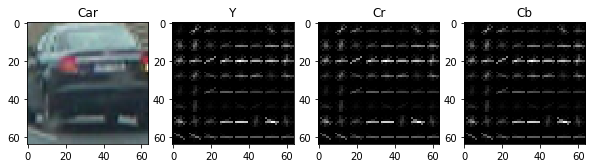

In [5]:
ShowHogFeatures(mpimg.imread(cars[0]), 'Car')

/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


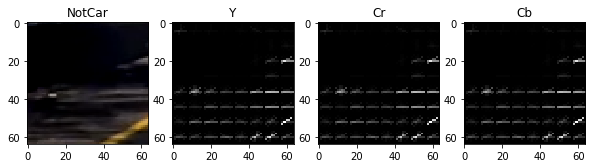

In [6]:
ShowHogFeatures(mpimg.imread(notcars[0]), 'NotCar')

### Build Model

In [7]:
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6156
2.99 Seconds to train SVC...
Test Accuracy of SVC =  0.9935


/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


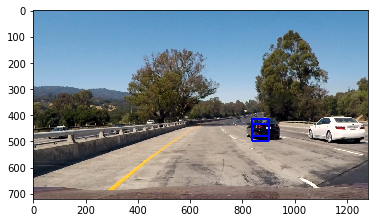

In [11]:
# Check the prediction time for a single sample
image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.7, 0.7))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

In [12]:
import pickle

data={
    'svc': svc,
    'X_scaler': X_scaler,
     }

with open('model.pk', 'wb') as model_file:
    pickle.dump(data, model_file)

In [13]:
hot_windows

[((836, 414), (900, 478)), ((836, 433), (900, 497))]

### Multiple Detections & False Positives

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


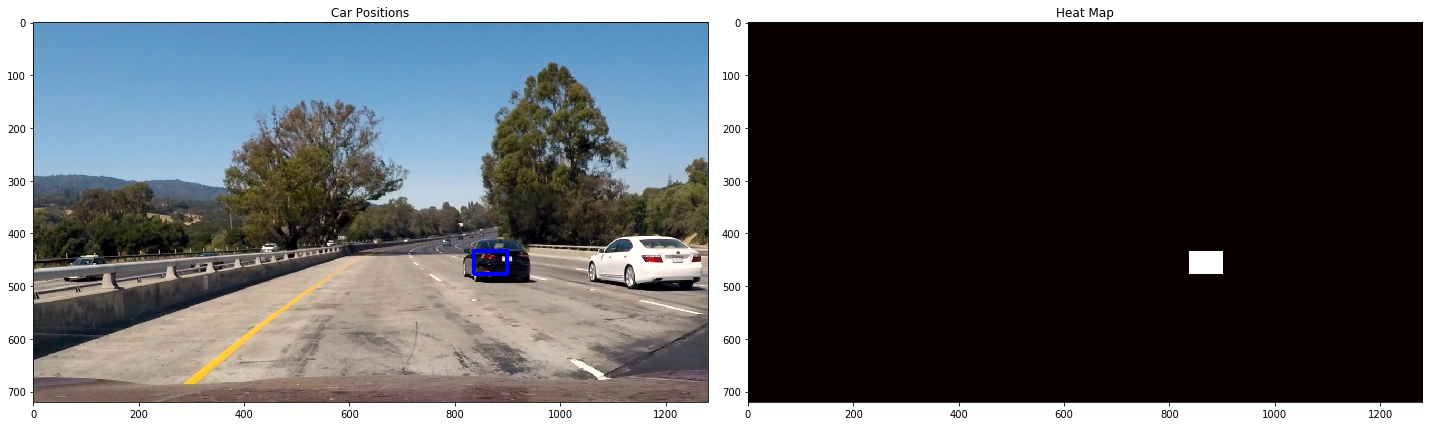

In [14]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


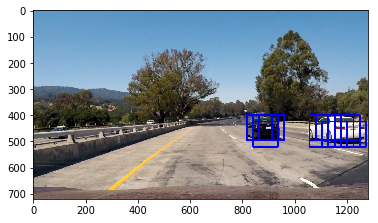

In [15]:
from lesson_functions import *
img = mpimg.imread('test_images/test1.jpg')

ystart = 400
ystop = 656
scale = 1.5
   
out_img, hot_windows = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.imshow(out_img)

In [16]:
def FindCarsOnImage(img):
  ystart = 400
  ystop = 700
  scale = 1.5
  out_img, hot_windows = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
  return out_img, hot_windows


def GetHeatMapImage(image, hot_windows):
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat, hot_windows)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,0)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return heatmap, draw_img, labels[0]

import glob
file_names = sorted(glob.glob('./test_images/*.jpg'))
print(file_names)

image_list = []
processed_image = []
heatmap_image = []
car_position = []
label_imgs = []
for image_file_name in file_names:
    image_list.append(mpimg.imread(image_file_name))
    
for image in image_list:
    out_img, hot_windows = FindCarsOnImage(image)
    processed_image.append(out_img)
    heatmap, draw_img, label_img = GetHeatMapImage(image, hot_windows)
    heatmap_image.append(heatmap)
    car_position.append(draw_img)
    label_imgs.append(label_img)

['./test_images/test1.jpg', './test_images/test2.jpg', './test_images/test3.jpg', './test_images/test4.jpg', './test_images/test5.jpg', './test_images/test6.jpg']


/usr/local/google/home/sayeesh/uc/conda/miniconda2/envs/tfgpu/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


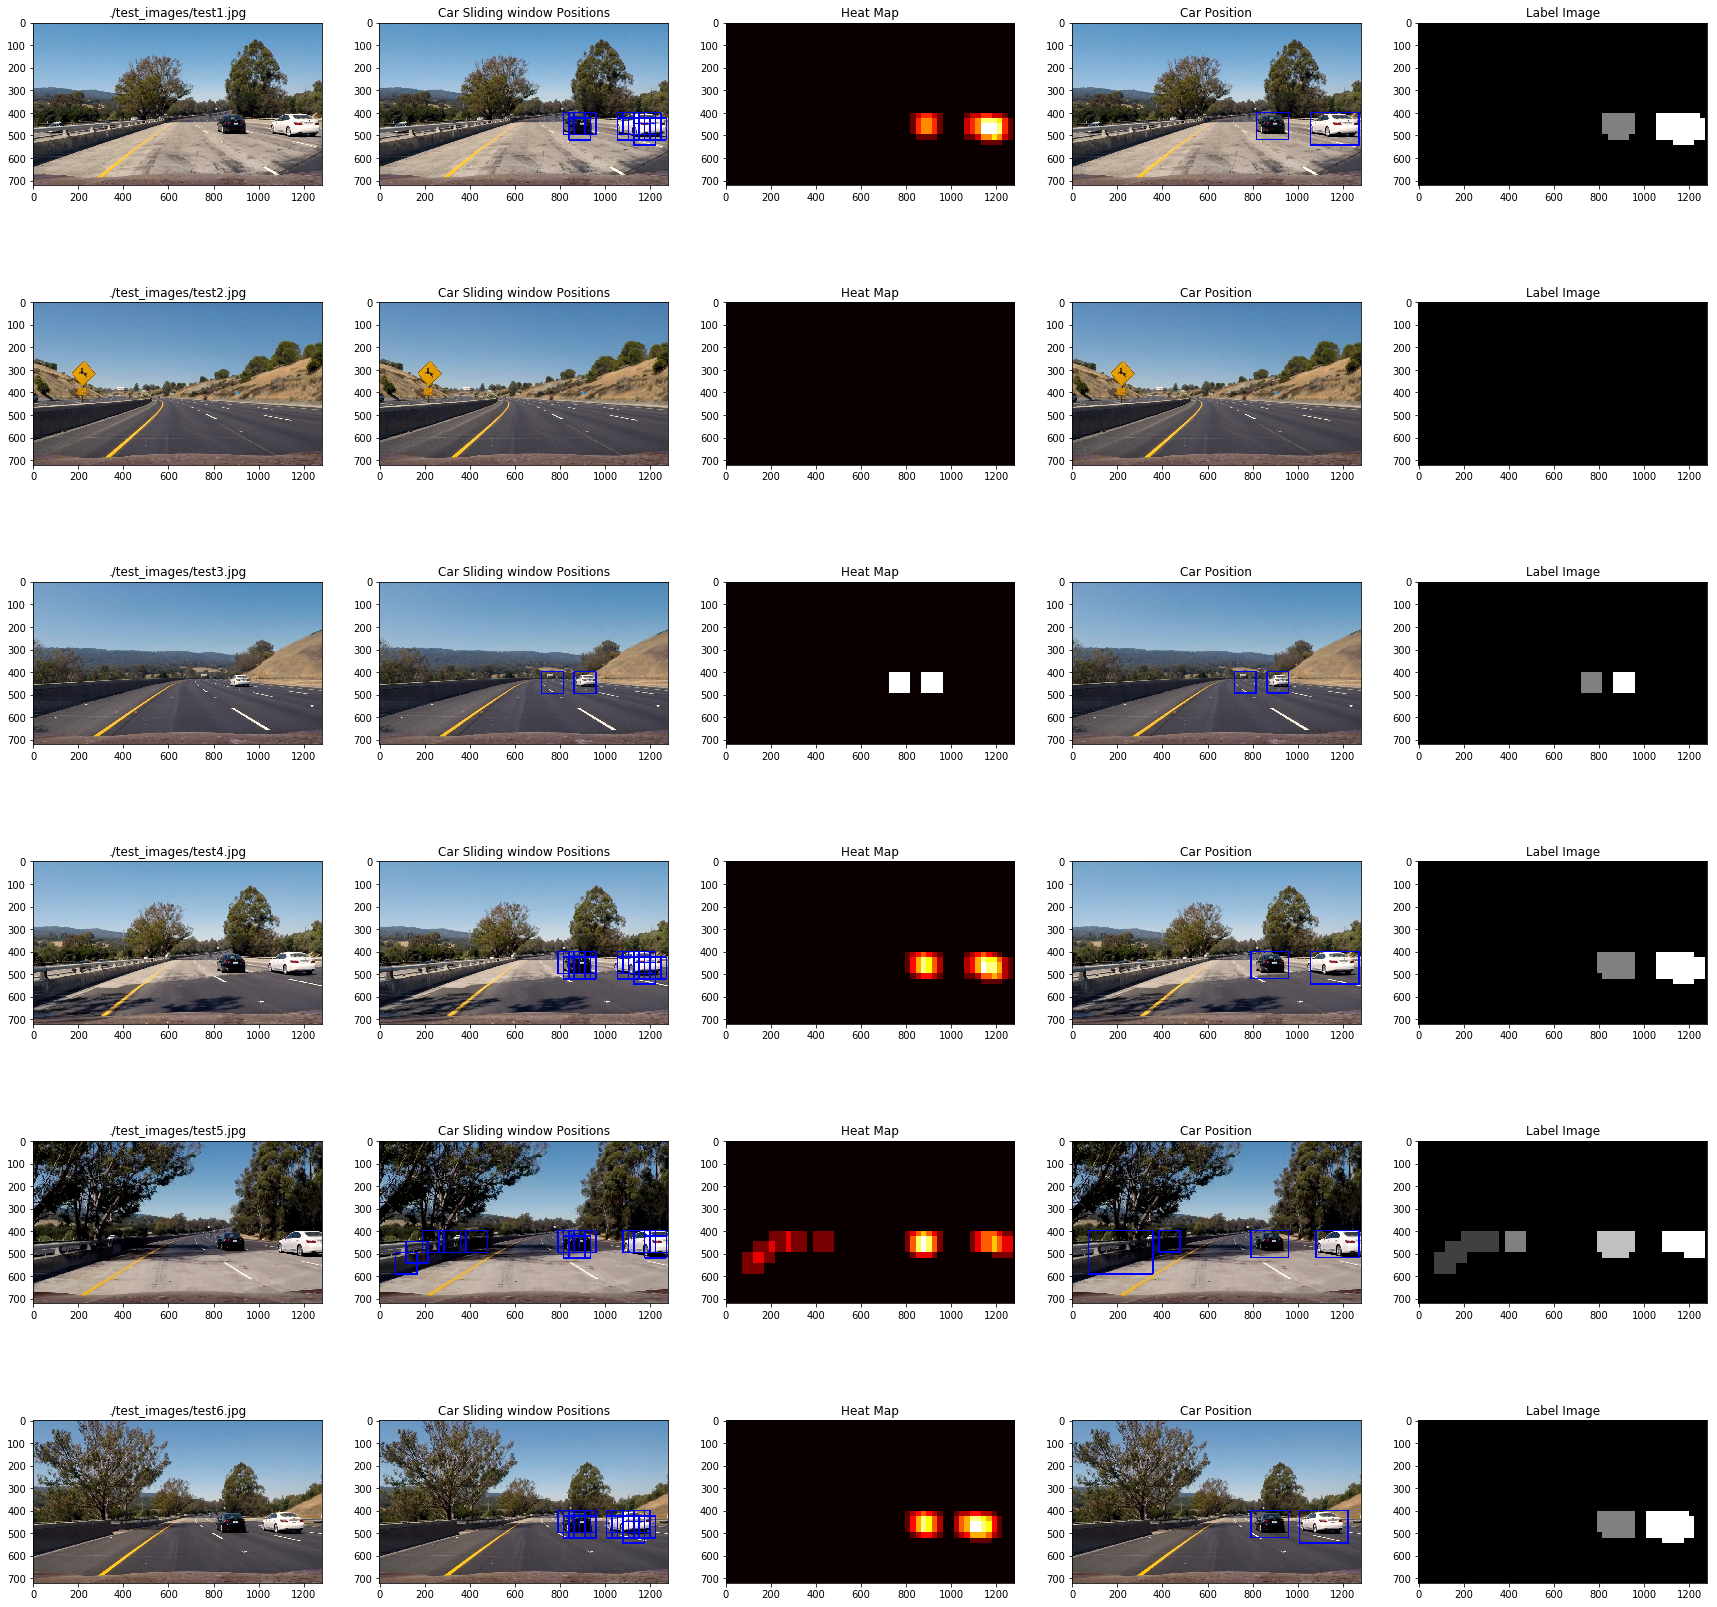

In [18]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(30, 30))
columns = 5
rows = len(image_list)
for i in range(rows):
    fig.add_subplot(rows, columns, columns*i+1)
    plt.imshow(image_list[i])
    plt.title(file_names[i])
    fig.add_subplot(rows, columns, columns*i+2)
    plt.imshow(processed_image[i])
    plt.title('Car Sliding window Positions')
    fig.add_subplot(rows, columns, columns*i+3)
    plt.imshow(heatmap_image[i], cmap='hot')
    plt.title('Heat Map')
    fig.add_subplot(rows, columns, columns*i+4)
    plt.imshow(car_position[i])
    plt.title('Car Position')
    fig.add_subplot(rows, columns, columns*i+5)
    plt.imshow(label_imgs[i], cmap='gray')
    plt.title('Label Image')
    
plt.show()

### Video Pipeline

In [42]:
# Import everything needed to edit/save/watch video clips# Import 
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [114]:
def get_labeled_bboxes(labels):
    # Iterate through all detected cars
    windows = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        windows.append(bbox)
    return windows


class VideoPipeline():
    def __init__(self):
        self.image_heat_history = []
        self.max_items = 15
        
    def append(self, heat_instance):
        if(len(self.image_heat_history) == self.max_items):
            self.image_heat_history.pop(0)
        self.image_heat_history.append(heat_instance)
    
    def get_avg_result(self):
        avged = np.average(self.image_heat_history, axis=0)
        return avged

    def process_image(self, img):
        ystart = 400
        ystop = 750
        scale = 1.5

        out_img, hot_windows = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        heat = np.zeros_like(image[:,:,0]).astype(np.float)

        # Add heat to each box in box list
        heat = add_heat(heat, hot_windows)
        labels = label(heat)
        labeled_windows = get_labeled_bboxes(labels)
        
        # Track across time series.
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        heat = add_heat(heat, labeled_windows)
        self.append(heat)
        
        # Apply threshold to help remove false positives
        heat = apply_threshold(self.get_avg_result(), 0.8)

        # Find final boxes from heatmap using label function
        labels = label(heat)
        draw_img = draw_labeled_bboxes(np.copy(img), labels)
        return draw_img


In [121]:
pipeline = VideoPipeline()

output = 'cars-detected.mp4'
clip2 = VideoFileClip('project_video.mp4')#.subclip(23,27)
#processed_clip = clip2.fl_image(FindCarsOnImage)
processed_clip = clip2.fl_image(pipeline.process_image)
%time processed_clip.write_videofile(output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

[MoviePy] >>>> Building video cars-detected.mp4
[MoviePy] Writing video cars-detected.mp4








  0%|          | 0/1261 [00:00<?, ?it/s]





  0%|          | 1/1261 [00:00<13:08,  1.60it/s]





  0%|          | 2/1261 [00:01<13:00,  1.61it/s]





  0%|          | 3/1261 [00:01<13:14,  1.58it/s]





  0%|          | 4/1261 [00:02<13:12,  1.59it/s]





  0%|          | 5/1261 [00:03<13:22,  1.57it/s]





  0%|          | 6/1261 [00:03<13:18,  1.57it/s]





  1%|          | 7/1261 [00:04<13:18,  1.57it/s]





  1%|          | 8/1261 [00:05<13:20,  1.57it/s]





  1%|          | 9/1261 [00:05<13:17,  1.57it/s]





  1%|          | 10/1261 [00:06<13:15,  1.57it/s]





  1%|          | 11/1261 [00:07<13:16,  1.57it/s]





  1%|          | 12/1261 [00:07<13:16,  1.57it/s]





  1%|          | 13/1261 [00:08<13:14,  1.57it/s]





  1%|          | 14/1261 [00:08<13:14,  1.57it/s]





  1%|          | 15/1261 [00:09<13:13,  1.57it/s]





  1%|▏         | 16/1261 [00:10<13:12,  1.57it/s]





  1%|▏         | 17/1261 [00:10<13:11,  1.57it/s]





  1%|▏         | 18/12

[MoviePy] Done.
[MoviePy] >>>> Video ready: cars-detected.mp4 

CPU times: user 1h 11min 39s, sys: 11min 16s, total: 1h 22min 56s
Wall time: 13min 49s


In [120]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))